In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import os
import datetime
import sklearn
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [70]:
chd = os.chdir('C:/Users/UvA/Waternet/data/')
CURR_DIR = os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [88]:
# Read data  
df = pd.read_excel(CURR_DIR + '\current\Output_AlleObjecten_20191231.xlsx', sheet_name='Details')

In [89]:
budf = df
data = budf
df = data

In [93]:
#df.reset_index()
#df.columns = ['peildatum','peildatum_begin','peildatum_eind','object_type','objectaanwezig','ojecttypetot','object_status','object_status_tot','ojectjaarverbruik','object_metingen']

In [101]:
df.head()

,PEILDATUM,PEILDATUM_BEGIN,PEILDATUM_EIND,OBJECT_TYPE_NAAM,OBJECT_TYPE_SINDS (aanwezig aansluiting/object),OBJECT_TYPE_TOT,OBJECT_STATUS_NAAM,OBJECT_STATUS_SINDS (opgevoerde huidige klant),OBJECT_STATUS_TOT,OBJECT_JAARVERBRUIK,OBJECT_#METINGEN
4,2019-12-31 00:00:00.000,2019-01-01 00:00:00.000,2019-12-31 23:59:59.000,GZB,2008-01-04 00:00:00.000,NaN,Actief,1998-06-06 00:00:00.000,NaN,567082.0,12.0
5,2019-12-31 00:00:00.000,2019-01-01 00:00:00.000,2019-12-31 23:59:59.000,GZB,2008-01-04 00:00:00.000,NaN,Actief,1998-06-06 00:00:00.000,NaN,538255.0,12.0
8,2019-12-31 00:00:00.000,2019-01-01 00:00:00.000,2019-12-31 23:59:59.000,GZB,1991-01-09 00:00:00.000,NaN,Actief,2017-03-02 00:00:00.000,NaN,217301.0,12.0
9,2019-12-31 00:00:00.000,2019-01-01 00:00:00.000,2019-12-31 23:59:59.000,GZB,2008-01-09 00:00:00.000,NaN,Actief,1992-02-13 00:00:00.000,NaN,208514.0,13.0
10,2019-12-31 00:00:00.000,2019-01-01 00:00:00.000,2019-12-31 23:59:59.000,GZB,2008-01-04 00:00:00.000,NaN,Actief,1992-01-02 00:00:00.000,NaN,185490.0,12.0


In [99]:
#only just type 572599 -> 572574 
df = df[(df['OBJECT_TYPE_NAAM'] != 'ENG')]
df = df[(df['OBJECT_TYPE_NAAM'] != 'IND')]

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572574 entries, 4 to 572598
Data columns (total 11 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   PEILDATUM                                        572574 non-null  object 
 1   PEILDATUM_BEGIN                                  572574 non-null  object 
 2   PEILDATUM_EIND                                   572574 non-null  object 
 3   OBJECT_TYPE_NAAM                                 572455 non-null  object 
 4   OBJECT_TYPE_SINDS (aanwezig aansluiting/object)  571363 non-null  object 
 5   OBJECT_TYPE_TOT                                  9 non-null       object 
 6   OBJECT_STATUS_NAAM                               572453 non-null  object 
 7   OBJECT_STATUS_SINDS (opgevoerde huidige klant)   542703 non-null  object 
 8   OBJECT_STATUS_TOT                                1921 non-null    object 
 9   OBJECT_JAARVERB

In [11]:
#df.loc[df['OBJECT_STATUS_TOT'].isnull(), 'OBJECT_STATUS_TOT'] = datetime.datetime.now()

In [152]:
variables = df.columns
count = []
for variable in variables:
    length = df[variable].count()
    count.append(length)
   
count_pct = np.round(100 * pd.Series(count) / len(df), 2)

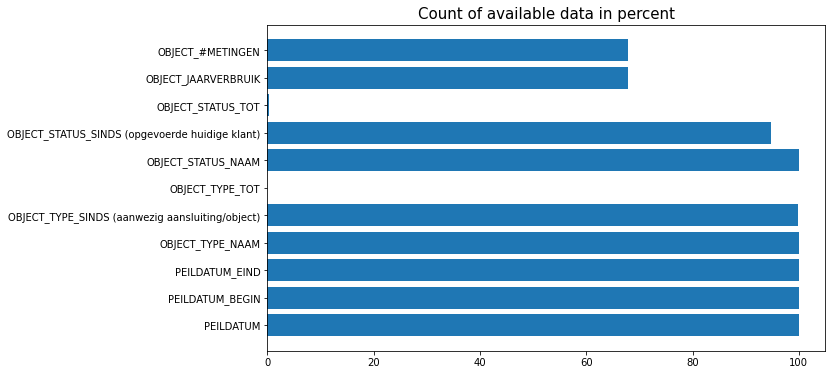

In [153]:
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572574 entries, 4 to 572598
Data columns (total 11 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   PEILDATUM                                        572574 non-null  object 
 1   PEILDATUM_BEGIN                                  572574 non-null  object 
 2   PEILDATUM_EIND                                   572574 non-null  object 
 3   OBJECT_TYPE_NAAM                                 572455 non-null  object 
 4   OBJECT_TYPE_SINDS (aanwezig aansluiting/object)  571363 non-null  object 
 5   OBJECT_TYPE_TOT                                  9 non-null       object 
 6   OBJECT_STATUS_NAAM                               572453 non-null  object 
 7   OBJECT_STATUS_SINDS (opgevoerde huidige klant)   542703 non-null  object 
 8   OBJECT_STATUS_TOT                                1921 non-null    object 
 9   OBJECT_JAARVERB

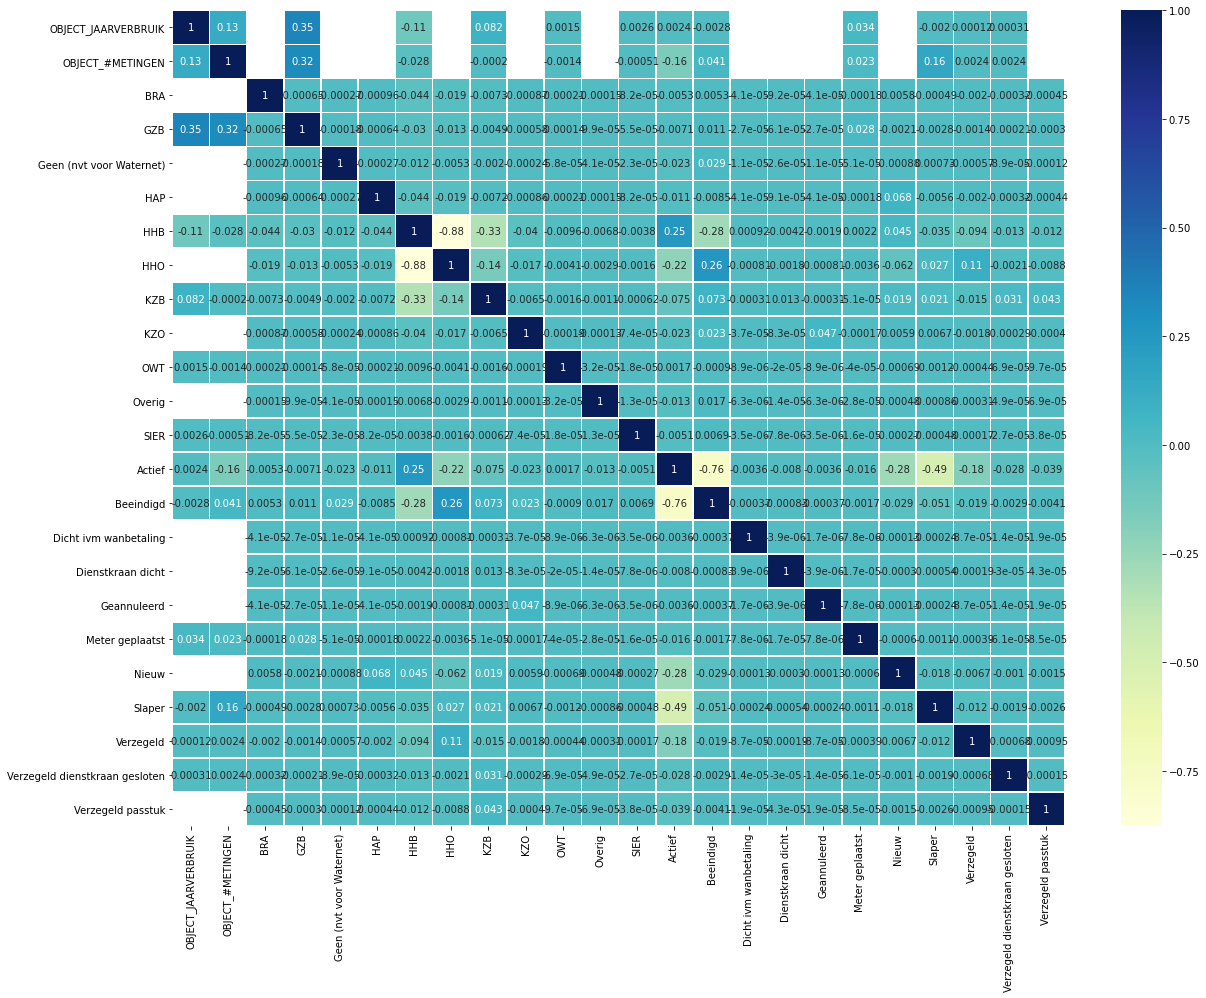

In [148]:
# Corr matrix
corr = dfml.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True, linewidths=.5, cmap="YlGnBu")

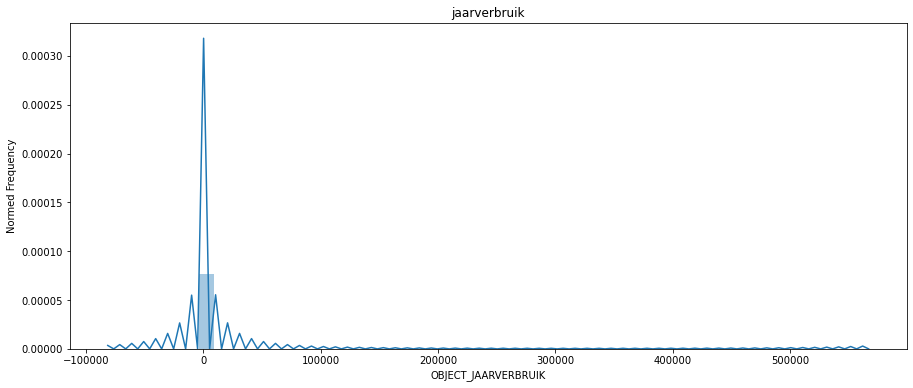

In [151]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df['OBJECT_JAARVERBRUIK'])
plt.title('jaarverbruik')
plt.ylabel('Normed Frequency')
plt.show()

In [141]:
# create dummies for objects to change them to nummeric values OBJECT_TYPE_NAAM, OBJECT_STATUS_NAAM
dummy1 = pd.get_dummies(dfml['OBJECT_TYPE_TOT'])
dummy2 = pd.get_dummies(dfml['OBJECT_STATUS_TOT'])

df_dummy = dfml.drop(['OBJECT_TYPE_TOT', 'OBJECT_STATUS_TOT'], axis = 1)
dfml1 = pd.concat([df_dummy, dummy1, dummy2], axis = 1)

In [142]:
X = dfml1.iloc[:,0:4]
Y = dfml1.iloc[:,-1]
names = dfml1.columns.values

In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572574 entries, 4 to 572598
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OBJECT_JAARVERBRUIK  388340 non-null  float64
 1   OBJECT_#METINGEN     388340 non-null  float64
 2   BRA                  572574 non-null  uint8  
 3   GZB                  572574 non-null  uint8  
dtypes: float64(2), uint8(2)
memory usage: 34.2 MB


In [149]:
# Build the model
#rfc = RandomForestClassifier()

# Fit the model
#rfc.fit(X, Y)

In [150]:
#print("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))